# Ejercicio 2 - Mejoras y Comparación de Modelos de Clasificación

Este ejercicio considera completar acciones para mejorar el rendimiento de modelos de clasificación supervisada, (similar al ejercicio 1), pero se enfoca en realizar un análisis comparativo entre diferentes modelos utilizados para entender las ventajas/desventajas de unos y otros sobre este dataset y sus condiciones.

## Contexto: Análisis de éxito en campaña de marketing

Fuente: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

El foco está en la implementación de varios clasificadores para predecir el valor de un atributo de interés, desde un *dataset* de información de un resultados de personas contactadas por una campaña de marketing y que compraron la oferta (atributo "OK"), con cerca de 41.200 registros de personas contactadas.

Este conjunto de datos (abierto para este tipo de usos instruccionales), consiste en 20 atributos y 1 clase de etiquetas (totalizando 21 columnas) y corresponde a los datos de una campaña telefónica a diversos clientes en Portugal, ofreciéndoles la compra de un producto bancario. En varios casos, un cliente fue contactado varias veces antes de aceptar el depósito a plazo ofrecido por la campaña (OK = yes).

Algunos de los atributos relevantes son (combinando atributos categóricos, con numéricos):
* **Datos personales**: Edad, Ocupación, Estado Civil, Nivel de Educación.
* **Datos financieros**: Su casa tiene crédito hipotecario, default: si el crédito ha caído en quiebra; tiene un crédito de consumo.
* **Datos de contactos de la campaña actual**: Tipo de Comunicación (celular o teléfono fijo); Mes del último contacto; Día de la semana del contacto; duración de la llamada (segundos); Contacto: N° de contactos durante la campaña; DíasAtrás: días transcurridos desde último contacto; Resultado: resultado de la última llamada (falló, no-existe, éxito)
* **Datos socioeconómicos**: EmpTasaVar: tasa de variación de empleabilidad; IPC: índice de precios consumidor mensual; ICC: índice de confianza consumidor mensual; Euribor3m: tasa euribor de 3 meses indicador diario; NumEmpleados: cantidad de gente empleada, en indicador trimestral.

Esta adaptación en particular, por el equipo de R:Solver (RSolver.com), enfrenta diferentes objetivos de aprendizaje dentro de los cursos de Big Data y Machine Learning.



## Instrucciones Generales
En este caso, se busca entender el comportamiento y desempeño de diferentes modelos de clasificación sobre este conjunto de datos, para predecir la variable de interés: **OK**, que servirá para predecir en casos futuros, según los datos de contactabilidad de un cliente, si el cliente aceptará o no contratar el depósito a plazo.

La entrega (grupal o individual, según corresponda) se materializa en un informe donde se contestan las preguntas que se indican en las secciones de "Preguntas", más adelante. Se puede recurrir a ejercicios de otras fuentes, así como al material de clases.

Dentro del informe se puede considerar una tabla de datos de ejecuciones comparadas de los modelos y con diferentes condiciones (balance de clases, proporciones de % entrenamiento-evaluación), apoyando las respuestas a las preguntas correspondientes.

La entrega se realiza en forma de un **informe en formato PDF, adjunto por email** utilizando la plantilla de informe que está en http://dcc.rsolver.com/dcc/docs/InformeActividad.docx

El informe en formato PDF debe ser subido por sólo uno de los integrantes a la siguiente URL

http://aiker.rsolver.com/aiker/DocUpload.aspx (*)

(*)Si hay problemas en la carga, enviar el PDF a rsandova@ing.puc.cl y cc: ayudante@aiker.ai

## Paso 1: Instación de las librerías de modelos de clasificación

Esto se ejecuta sólo una vez al comienzo de la sesión de cada persona. No se necesita volver a ejecutar con cada nueva prueba del resto de los scripts. Aquí se incluyen liberías para ejecutar todos los modelos.

In [64]:
install.packages('e1071')
install.packages('caret')
install.packages('randomForest')
install.packages('class')
install.packages("nnet")

Installing package into ‘/home/nestorprr/R/x86_64-pc-linux-gnu-library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/nestorprr/R/x86_64-pc-linux-gnu-library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/nestorprr/R/x86_64-pc-linux-gnu-library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/nestorprr/R/x86_64-pc-linux-gnu-library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/nestorprr/R/x86_64-pc-linux-gnu-library’
(as ‘lib’ is unspecified)



##Paso 2: Carga y preprocesamiento de los datos ##

A continuación se cargan el conjunto de datos desde la URL de origen. Esta versión preprocesa el dataset, realizando actividades de limpieza de datos, eliminando filas con algún NA y eliminando unas pocas columnas que se determinan como no-relevantes en el desempeño de modelos de clasificación.

Adicionalmente, se realiza un balance entre las clases, reduciendo la cantidad de ejemplos de la clase mayoritaria para aproximarse a la otra.

Se entiende que con estas acciones de preprocesamiento del dataset, ya se llega en mejores condiciones a este nuevo ejercicio.

Este código se puede ejecutar sólo una vez para uso del dataset resultante en los siguientes pasos.

In [56]:
# Se cargan las librerías

library(randomForest)
library(caret)
library(e1071)
library(nnet)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Se declara la URL de dónde obtener los datos
theUrlMain <- "http://www.rsolver.com/dcc/docs/bank-additional-full.csv"

# Se declaran los nombres de las columnas
columnas = c("Edad","Ocupación","EstadoCivil","Educación","Default","Hipotecario","Consumo","Contacto","Mes","Día",
             "Duración","NumContactos","DíasAtrás","Previo","ResultadoPrevio",
             "EmpTasaVar", "IPC", "ICC", "Euribor3m", "NumEmpleados", "OK")

# Se cargan datos principales a una estructura o dataset (marketing.data), asignando nombres de atributos a las columnas.
# Nótese que se incluye la conversión de valores "unknown" a "NA" para facilitar la gestión vacíos más adelante.
marketing.data <- read.table(file = theUrlMain, header = TRUE, sep = ";", col.names = columnas, na.strings=c("unknown","NA"))

# Se eliminan aquellos atributos que no aportan en el desempeño de los modelos
# Esto se determinó en un trabajo previo, fuera de esta actividad
marketing.data$Default <- NULL
marketing.data$DíasAtrás <- NULL
marketing.data$Previo <- NULL
marketing.data$Euribor3m <- NULL

# Se eliminan los registros que tienen algún NA (antes: 'unknown')
# Nótese que se hace esta limpieza posterior a la eliminación de columnas,
# logrando conservar la enorme mayoría de los registros.
marketing.clean <- na.omit(marketing.data)
dim(marketing.clean) # Sólo quedan poco más de 38.000 filas (de las 41.000 originales)

# Se muestran las primeras líneas del dataset, incluyendo sólo las columnas que quedaron.
head(marketing.clean, 20)

[1] 38245    17

,Edad,Ocupación,EstadoCivil,Educación,Hipotecario,Consumo,Contacto,Mes,Día,Duración,NumContactos,ResultadoPrevio,EmpTasaVar,IPC,ICC,NumEmpleados,OK
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,nonexistent,1.1,93.994,-36.4,5191,no
2,57,services,married,high.school,no,no,telephone,may,mon,149,1,nonexistent,1.1,93.994,-36.4,5191,no
3,37,services,married,high.school,yes,no,telephone,may,mon,226,1,nonexistent,1.1,93.994,-36.4,5191,no
4,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,nonexistent,1.1,93.994,-36.4,5191,no
5,56,services,married,high.school,no,yes,telephone,may,mon,307,1,nonexistent,1.1,93.994,-36.4,5191,no
6,45,services,married,basic.9y,no,no,telephone,may,mon,198,1,nonexistent,1.1,93.994,-36.4,5191,no
7,59,admin.,married,professional.course,no,no,telephone,may,mon,139,1,nonexistent,1.1,93.994,-36.4,5191,no
9,24,technician,single,professional.course,yes,no,telephone,may,mon,380,1,nonexistent,1.1,93.994,-36.4,5191,no
10,25,services,single,high.school,yes,no,telephone,may,mon,50,1,nonexistent,1.1,93.994,-36.4,5191,no


In [3]:
# Aquí se arman dos subconjuntos con los datos de cada una de las dos clases.
# Se pueden ver los respectivos tamaños al terminar, evidenciando un desbalance.
set.seed(123)
clean.data.YES <- marketing.clean[marketing.clean$OK == 'yes',]
clean.data.NO <- marketing.clean[marketing.clean$OK == 'no',]
cat("Cantidad de ejemplos por clase: YES & NO\n")
dim(clean.data.YES) # Este es el conjunto más pequeño con poco más de 4.000 ejemplos
dim(clean.data.NO)  # Este es mayoritario con casi 34.000 ejemplos, evidenciando desbalance entre clases

# A continuación se realiza un re-balanceo de las clases (random subsampling),
# que consiste en reducir la cantidad de ejemplos de la clase más masiva, para acercarla a la minoritaria.
balance_ratio <- 1.2 # Se elige un balanceo de 20% más de ejemplos de la clase negativa que la positiva

clean.subdata.YES <- clean.data.YES  # No se aplica sample(); se usan todos los ejemplos de la clase YES (que es la que tiene menos ejemplos)
clean.subdata.NO <- clean.data.NO[sample(nrow(clean.data.NO), balance_ratio*dim(clean.data.YES)[1]), ] # Se elige un subconjunto de los NO

# Muestra cantidad de ejemplos contenidos en cada subconjunto
cat("Cantidad de ejemplos por clase luego del balance entre clases: YES & NO\n")
dim(clean.subdata.YES)
dim(clean.subdata.NO)

# Se juntan para el conjunto de referencia, ahora más balanceado
clean.subdata <- rbind(clean.subdata.YES, clean.subdata.NO)

cat("Resumen del dataset ya limpio")
summary(clean.subdata)

Cantidad de ejemplos por clase: YES & NO


[1] 4258   17

[1] 33987    17

Cantidad de ejemplos por clase luego del balance entre clases: YES & NO


[1] 4258   17

[1] 5109   17

Resumen del dataset ya limpio

      Edad       Ocupación         EstadoCivil         Educación        
 Min.   :18.0   Length:9367        Length:9367        Length:9367       
 1st Qu.:32.0   Class :character   Class :character   Class :character  
 Median :37.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   :40.2                                                           
 3rd Qu.:48.0                                                           
 Max.   :98.0                                                           
 Hipotecario          Consumo            Contacto             Mes           
 Length:9367        Length:9367        Length:9367        Length:9367       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

## Ejercicio 1: Preparación conjuntos de entrenamiento y evaluación

En este caso, lo importante es considerar que **es posible cambiar la proporción de datos de entrenamiento y test** viendo el efecto que tiene en el desempeño de los modelos (del ejercicio 2: RandomForest, SVM, NB), viendo que alguno o varios de los modelos entregan mejores resultados considerando lo que más puede interesar, entre Accuracy, Sensitivity, Specificity.

**Pregunta 1** (1.5 puntos)

¿Cuál es la proporción entrenamiento/test que logra mejor desempeño y con cuál de los modelos entre RandomForest, SVM, NB?

El objetivo es probar varias combinaciones cambiando la proporción de datos. Preliminarmente 4 combinaciones, desde 60%/40% hasta 90%/10%. Según los resultados de la ejecución de todos los modelos de clasificación más adelante, determinar y explicitar cuál es la proporción que logra mejores resultados o desmpeño de clasificación y cuál es la influencia del cambio de proporción de entrenamiento/test. Particularmente se espera que los alumnos determinen cómo se elige el mejor modelo (comparando Sensitivity, Specificity, Accuracy).

Se pide documentar en una tabla todas las combinaciones, viendo los indicadores de desempeño más relevantes: Accuracy, Sensitivity, Specificity, **determinando cuál combinación da mejores resultados para cuál de los modelos** (RandomForest, NB, SVM), considerando que el desempeño se logra por maximizar el desempeño de la predicción de YES, además de un buen modelo balanceado (accuracy).


In [4]:
# Primero, se saca una copia del dataset para trabajar sin modificar el original
# Esto permite hacer más modificaciones y correr este código varias veces sin alterar clean.subdata
set.seed(123)
working.data <- clean.subdata

# EJERCICIO 1
# Ahora se configuran los conjuntos de entrenamiento y testing en una proporción
# (por ej: 0.70 = 70% para training y el resto para evaluación o testing)
# Se pide probar diferentes combinaciones (60/40, 70/30, 80/20, 90/10)
# hasta determinar cuál es la mejor en cuál de los modelos.
ratio1 = sample(1:nrow(working.data), size = 0.80*nrow(working.data))
training.data1 = working.data[ratio1,]
testing.data1 = working.data[-ratio1,]

# Se comparan los tamaños de ejemplos para entrenamiento y evaluación.
dim(training.data1)
dim(testing.data1)

head(training.data1)

[1] 7493   17

[1] 1874   17

,Edad,Ocupación,EstadoCivil,Educación,Hipotecario,Consumo,Contacto,Mes,Día,Duración,NumContactos,ResultadoPrevio,EmpTasaVar,IPC,ICC,NumEmpleados,OK
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
36743,27,admin.,single,university.degree,no,no,cellular,jun,mon,138,3,nonexistent,-2.9,92.963,-40.8,5076.2,yes
36892,25,student,single,university.degree,no,yes,telephone,jun,thu,280,6,failure,-2.9,92.963,-40.8,5076.2,yes
15801,39,self-employed,married,high.school,no,no,cellular,jul,mon,761,2,nonexistent,1.4,93.918,-42.7,5228.1,no
38405,39,admin.,single,high.school,yes,no,cellular,oct,tue,386,1,nonexistent,-3.4,92.431,-26.9,5017.5,yes
30730,58,admin.,single,university.degree,yes,no,cellular,may,tue,851,1,nonexistent,-1.8,92.893,-46.2,5099.1,yes
10495,31,services,married,high.school,no,no,telephone,jun,tue,37,6,nonexistent,1.4,94.465,-41.8,5228.1,no


## Ejercicio 2: Comparación de desempeño de modelos de clasificación y su explicación

Habiendo definido los conjuntos de entrenamiento y de test, a continuación se ejecutan unos modelos de clasificación: un RandomForest, un Naive Bayes, y un Support Vector Machine. Cada uno obtiene sus resultados, mostrando sus precisiones en desempeño. No es necesario modificar estos bloques de código. Basta con hacer los cambios en la parte del ejercicio 1 (proporción entrenamiento/test) y volver a ejecutar estos modelos para evaluar su desempeño.

Una vez completado el ejercicio 1 anterior (habiendo quedado con una ejecución de mejor desempeño y habiendo realizado la comparación de los indicadores), se pueden contestar las preguntas a continuación, que se centran en interpretar y analizar comparativamente del desempeño de estos modelos.

**Pregunta 2.1** (1 punto)

Viendo que un balance de clases de 1.2 (sólo un 20% más de ejemplos de la clase negativa sobre la positiva), donde reduce notoriamente la cantidad de ejemplos de la clase negativa, ¿por qué considera que se logra esa mejoría, a pesar de eliminar de entrenamiento y evaluación esa cantidad de ejemplos originales? (Justifique con claridad, según lo que se conoce sobre la forma en que se entrenan los modelos).

**Pregunta 2.2** (1 punto)

Habiendo determinado en el ejercicio 1 cuál es el modelo que tiene mejor desempeño entre todos, con una mejor proporción de entrenamiento/test ¿qué características del modelo apoyan su mejor desempeño sobre los otros modelos, aunque la diferencia haya sido menor? (Justifique con claridad, según lo que se conoce sobre las características particulares de los modelos y por qué ese modelo muestra mejor desempeño que los otros).

Recuerde que sólo se comparan los 3 modelos a continuación.


**Random Forest**

In [5]:
# Random Forest
set.seed(123)
RF_model1 <- randomForest(as.factor(OK) ~ ., data=training.data1, method="class")
RF_predict1 <- predict(RF_model1, testing.data1, type = "class")
confusionMatrix(RF_predict1, as.factor(testing.data1$OK), positive = 'yes')

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  891  78
       yes 132 773
                                          
               Accuracy : 0.8879          
                 95% CI : (0.8728, 0.9019)
    No Information Rate : 0.5459          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7752          
                                          
 Mcnemar's Test P-Value : 0.0002548       
                                          
            Sensitivity : 0.9083          
            Specificity : 0.8710          
         Pos Pred Value : 0.8541          
         Neg Pred Value : 0.9195          
             Prevalence : 0.4541          
         Detection Rate : 0.4125          
   Detection Prevalence : 0.4829          
      Balanced Accuracy : 0.8897          
                                          
       'Positive' Class : yes             
                              

**Naive Bayes**

In [6]:
# Naive Bayes
set.seed(123)
NB_model1 <- naiveBayes(as.factor(OK) ~ ., data=training.data1)
NB_predict1 <- predict(NB_model1, testing.data1, type = "class")
confusionMatrix(NB_predict1, as.factor(testing.data1$OK), positive = 'yes')

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  794 146
       yes 229 705
                                         
               Accuracy : 0.7999         
                 95% CI : (0.781, 0.8178)
    No Information Rate : 0.5459         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5997         
                                         
 Mcnemar's Test P-Value : 2.291e-05      
                                         
            Sensitivity : 0.8284         
            Specificity : 0.7761         
         Pos Pred Value : 0.7548         
         Neg Pred Value : 0.8447         
             Prevalence : 0.4541         
         Detection Rate : 0.3762         
   Detection Prevalence : 0.4984         
      Balanced Accuracy : 0.8023         
                                         
       'Positive' Class : yes            
                                         

**Support Vector Machine**

In [7]:
# Support Vector Machine (NOTA: toma algunos minutos su ejecución)
set.seed(123)
SVM_model1 <- svm(as.factor(OK) ~ ., data = training.data1, cost = 10, scale = FALSE)
SVM_predict1 <- predict(SVM_model1, testing.data1, type = "class")
confusionMatrix(SVM_predict1, as.factor(testing.data1$OK), positive = 'yes')

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  839 144
       yes 184 707
                                         
               Accuracy : 0.825          
                 95% CI : (0.807, 0.8419)
    No Information Rate : 0.5459         
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.6484         
                                         
 Mcnemar's Test P-Value : 0.03129        
                                         
            Sensitivity : 0.8308         
            Specificity : 0.8201         
         Pos Pred Value : 0.7935         
         Neg Pred Value : 0.8535         
             Prevalence : 0.4541         
         Detection Rate : 0.3773         
   Detection Prevalence : 0.4755         
      Balanced Accuracy : 0.8255         
                                         
       'Positive' Class : yes            
                                         

In [8]:
# Se realiza la prueba con 90/10
set.seed(123)
ratio2 = sample(1:nrow(working.data), size = 0.90*nrow(working.data))
training.data2 = working.data[ratio2,]
testing.data2 = working.data[-ratio2,]

# Random Forest

RF_model2 <- randomForest(as.factor(OK) ~ ., data=training.data2, method="class")
RF_predict2 <- predict(RF_model2, testing.data2, type = "class")
cat("Random Forest")
confusionMatrix(RF_predict2, as.factor(testing.data2$OK), positive = 'yes')

# Naive Bayes
NB_model2 <- naiveBayes(as.factor(OK) ~ ., data=training.data2)
NB_predict2 <- predict(NB_model2, testing.data2, type = "class")
cat("Naive Bayes")
confusionMatrix(NB_predict2, as.factor(testing.data2$OK), positive = 'yes')


# Support Vector Machine (NOTA: toma algunos minutos su ejecución)
SVM_model2 <- svm(as.factor(OK) ~ ., data = training.data2, cost = 10, scale = FALSE)
SVM_predict2 <- predict(SVM_model2, testing.data2, type = "class")
cat("Support Vector Machine")
confusionMatrix(SVM_predict2, as.factor(testing.data2$OK), positive = 'yes')

Random Forest

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  434  46
       yes  65 392
                                          
               Accuracy : 0.8815          
                 95% CI : (0.8591, 0.9015)
    No Information Rate : 0.5326          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7627          
                                          
 Mcnemar's Test P-Value : 0.08755         
                                          
            Sensitivity : 0.8950          
            Specificity : 0.8697          
         Pos Pred Value : 0.8578          
         Neg Pred Value : 0.9042          
             Prevalence : 0.4674          
         Detection Rate : 0.4184          
   Detection Prevalence : 0.4877          
      Balanced Accuracy : 0.8824          
                                          
       'Positive' Class : yes             
                              

Naive Bayes

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  379  74
       yes 120 364
                                          
               Accuracy : 0.793           
                 95% CI : (0.7656, 0.8185)
    No Information Rate : 0.5326          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5868          
                                          
 Mcnemar's Test P-Value : 0.001234        
                                          
            Sensitivity : 0.8311          
            Specificity : 0.7595          
         Pos Pred Value : 0.7521          
         Neg Pred Value : 0.8366          
             Prevalence : 0.4674          
         Detection Rate : 0.3885          
   Detection Prevalence : 0.5165          
      Balanced Accuracy : 0.7953          
                                          
       'Positive' Class : yes             
                              

Support Vector Machine

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  411  80
       yes  88 358
                                          
               Accuracy : 0.8207          
                 95% CI : (0.7946, 0.8448)
    No Information Rate : 0.5326          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6403          
                                          
 Mcnemar's Test P-Value : 0.5892          
                                          
            Sensitivity : 0.8174          
            Specificity : 0.8236          
         Pos Pred Value : 0.8027          
         Neg Pred Value : 0.8371          
             Prevalence : 0.4674          
         Detection Rate : 0.3821          
   Detection Prevalence : 0.4760          
      Balanced Accuracy : 0.8205          
                                          
       'Positive' Class : yes             
                              

In [9]:
# Se realiza la prueba con 70/30
set.seed(123)
ratio3 = sample(1:nrow(working.data), size = 0.70*nrow(working.data))
training.data3 = working.data[ratio3,]
testing.data3 = working.data[-ratio3,]

# Random Forest

RF_model3 <- randomForest(as.factor(OK) ~ ., data=training.data3, method="class")
RF_predict3 <- predict(RF_model3, testing.data3, type = "class")
cat("Random Forest")
confusionMatrix(RF_predict3, as.factor(testing.data3$OK), positive = 'yes')

# Naive Bayes
NB_model3 <- naiveBayes(as.factor(OK) ~ ., data=training.data3)
NB_predict3 <- predict(NB_model3, testing.data3, type = "class")
cat("Naive Bayes")
confusionMatrix(NB_predict3, as.factor(testing.data3$OK), positive = 'yes')


# Support Vector Machine (NOTA: toma algunos minutos su ejecución)
SVM_model3 <- svm(as.factor(OK) ~ ., data = training.data3, cost = 10, scale = FALSE)
SVM_predict3 <- predict(SVM_model3, testing.data3, type = "class")
cat("Support Vector Machine")
confusionMatrix(SVM_predict3, as.factor(testing.data3$OK), positive = 'yes')

Random Forest

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1338  122
       yes  208 1143
                                          
               Accuracy : 0.8826          
                 95% CI : (0.8701, 0.8943)
    No Information Rate : 0.55            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7643          
                                          
 Mcnemar's Test P-Value : 2.881e-06       
                                          
            Sensitivity : 0.9036          
            Specificity : 0.8655          
         Pos Pred Value : 0.8460          
         Neg Pred Value : 0.9164          
             Prevalence : 0.4500          
         Detection Rate : 0.4066          
   Detection Prevalence : 0.4806          
      Balanced Accuracy : 0.8845          
                                          
       'Positive' Class : yes             
                        

Naive Bayes

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1199  216
       yes  347 1049
                                          
               Accuracy : 0.7997          
                 95% CI : (0.7844, 0.8144)
    No Information Rate : 0.55            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5992          
                                          
 Mcnemar's Test P-Value : 4.281e-08       
                                          
            Sensitivity : 0.8292          
            Specificity : 0.7755          
         Pos Pred Value : 0.7514          
         Neg Pred Value : 0.8473          
             Prevalence : 0.4500          
         Detection Rate : 0.3732          
   Detection Prevalence : 0.4966          
      Balanced Accuracy : 0.8024          
                                          
       'Positive' Class : yes             
                        

Support Vector Machine

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1235  200
       yes  311 1065
                                          
               Accuracy : 0.8182          
                 95% CI : (0.8035, 0.8323)
    No Information Rate : 0.55            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6357          
                                          
 Mcnemar's Test P-Value : 1.138e-06       
                                          
            Sensitivity : 0.8419          
            Specificity : 0.7988          
         Pos Pred Value : 0.7740          
         Neg Pred Value : 0.8606          
             Prevalence : 0.4500          
         Detection Rate : 0.3789          
   Detection Prevalence : 0.4895          
      Balanced Accuracy : 0.8204          
                                          
       'Positive' Class : yes             
                        

In [10]:
# Se realiza la prueba con 60/40
set.seed(123)
ratio4 = sample(1:nrow(working.data), size = 0.60*nrow(working.data))
training.data4 = working.data[ratio4,]
testing.data4 = working.data[-ratio4,]

# Random Forest

RF_model4 <- randomForest(as.factor(OK) ~ ., data=training.data4, method="class")
RF_predict4 <- predict(RF_model4, testing.data4, type = "class")
cat("Random Forest")
confusionMatrix(RF_predict4, as.factor(testing.data4$OK), positive = 'yes')

# Naive Bayes
NB_model4 <- naiveBayes(as.factor(OK) ~ ., data=training.data4)
NB_predict4 <- predict(NB_model4, testing.data4, type = "class")
cat("Naive Bayes")
confusionMatrix(NB_predict4, as.factor(testing.data4$OK), positive = 'yes')


# Support Vector Machine (NOTA: toma algunos minutos su ejecución)
SVM_model4 <- svm(as.factor(OK) ~ ., data = training.data4, cost = 10, scale = FALSE)
SVM_predict4 <- predict(SVM_model4, testing.data4, type = "class")
cat("Support Vector Machine")
confusionMatrix(SVM_predict4, as.factor(testing.data4$OK), positive = 'yes')

Random Forest

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1792  158
       yes  276 1521
                                          
               Accuracy : 0.8842          
                 95% CI : (0.8735, 0.8943)
    No Information Rate : 0.5519          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7674          
                                          
 Mcnemar's Test P-Value : 1.952e-08       
                                          
            Sensitivity : 0.9059          
            Specificity : 0.8665          
         Pos Pred Value : 0.8464          
         Neg Pred Value : 0.9190          
             Prevalence : 0.4481          
         Detection Rate : 0.4059          
   Detection Prevalence : 0.4796          
      Balanced Accuracy : 0.8862          
                                          
       'Positive' Class : yes             
                        

Naive Bayes

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1598  267
       yes  470 1412
                                          
               Accuracy : 0.8033          
                 95% CI : (0.7902, 0.8159)
    No Information Rate : 0.5519          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6068          
                                          
 Mcnemar's Test P-Value : 1.001e-13       
                                          
            Sensitivity : 0.8410          
            Specificity : 0.7727          
         Pos Pred Value : 0.7503          
         Neg Pred Value : 0.8568          
             Prevalence : 0.4481          
         Detection Rate : 0.3768          
   Detection Prevalence : 0.5023          
      Balanced Accuracy : 0.8069          
                                          
       'Positive' Class : yes             
                        

Support Vector Machine

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1650  257
       yes  418 1422
                                         
               Accuracy : 0.8199         
                 95% CI : (0.8072, 0.832)
    No Information Rate : 0.5519         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.639          
                                         
 Mcnemar's Test P-Value : 7.348e-10      
                                         
            Sensitivity : 0.8469         
            Specificity : 0.7979         
         Pos Pred Value : 0.7728         
         Neg Pred Value : 0.8652         
             Prevalence : 0.4481         
         Detection Rate : 0.3795         
   Detection Prevalence : 0.4911         
      Balanced Accuracy : 0.8224         
                                         
       'Positive' Class : yes            
                                         

# Ejercicio 3: Implementación de una Red Neuronal
A continuación se declara, entrena y evalúa un modelo de Red Neuronal. Esta primera declaración viene con una configuración inicial, que se podrá modificar para ver posibles mejoras en el desempeño de esta red.

Esta configuración considera lo siguiente:

*     **Nótese que sólo se utilizan algunos atributos del dataset**, que vienen en la declaración de la fórmula (1er argumento) de nnet(). Se pueden eliminar algunos y ver si mejora el desempeño.

*     Se usa una única capa escondida o intermedia. Su cantidad de nodos está dada por el atributo 'size'. Se puede agrandar o reducir para ver posibles mejoras.

*     La cantidad de iteraciones para mejorar el entrenamiento se da por el atributo 'maxit'. Se puede aumentar, esperando mejorar el desempeño.

*     El atributo 'maxNWts' limita el tamaño interno de la red, que dadas las restricciones de capacidad de procesamiento que entrega Google Colab, conviene acotarlo, para evitar sobrepasar la memora y tener una ejecución fallida. No es necesario modificar este atributo.

Hay otros atributos posibles de analizar y modificar en https://www.rdocumentation.org/packages/nnet/versions/7.3-14/topics/nnet. Nótese que la configuración por defecto usa una activación logística, pero es posible aplicar softmax o linout, pero eso requiere de parámetros adicionales.

Ojo/recomendación: dada la naturaleza aleatoria del comportamiento del entrenamiento, en ocasiones la red neuronal no entrega resultados para la clase menos representada y genera un error. En cuyo caso, sólo basta con volver a ejecutar el código, para que - aleatoriamente - logre dar resultados en dicha clase.

**Ejercicio 3:**

Probar diferentes versiones del modelo, cambiando:
*     Los atributos considerados. Por simplicidad se recomienda sólo eliminar algunos de la lista original, para ver si en alguna ejecución esa eliminación genera mejores resultados.
*     La cantidad de nodos de la capa escondida (size).
*     La cantidad de iteraciones (maxit).

Por simplicidad de este ejercicio, se recomienda sólo probar 4 combinaciones de cada uno de los 3 elementos a cambiar. Se pueden elegir los valores de esos cambios y documentar en una tabla de ejecuciones comparadas para contestar la pregunta 3.1.

**Preg 3.1** (1.8 puntos): ¿Cuáles son los parámetros de ejecución del modelo que dan el mejor desempeño de la Red Neuronal?

**Preg 3.2** (0.7 puntos): ¿Logra superar al mejor modelo de los primeros 3 modelos? ¿Por qué considera que si o no y qué caracteristica distinta entre estos 2 modelos hace la diferencia? (En cualquier caso, se pide una posible y teórica explicación de por qué es mejor/peor que ese otro modelo.)

In [9]:
training.data1$Ocupación <- as.factor(training.data1$Ocupación)
training.data1$EstadoCivil <- as.factor(training.data1$EstadoCivil)
training.data1$Educación <- as.factor(training.data1$Educación)
summary(training.data1)

      Edad             Ocupación      EstadoCivil                 Educación   
 Min.   :18.00   admin.     :2048   divorced: 776   basic.4y           : 783  
 1st Qu.:32.00   blue-collar:1461   married :4432   basic.6y           : 399  
 Median :37.00   technician :1206   single  :2285   basic.9y           : 985  
 Mean   :40.19   services   : 656                   high.school        :1805  
 3rd Qu.:48.00   management : 564                   illiterate         :   4  
 Max.   :98.00   retired    : 456                   professional.course: 979  
                 (Other)    :1102                   university.degree  :2538  
 Hipotecario          Consumo            Contacto             Mes           
 Length:7493        Length:7493        Length:7493        Length:7493       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                            

In [83]:
# Combinaciones de atributos
atributos1 = as.factor(OK) ~ Edad + Ocupación + EstadoCivil + Educación + Duración + NumContactos + EmpTasaVar + NumEmpleados
atributos2 = as.factor(OK) ~ Edad + Ocupación + EstadoCivil + Educación + Duración + NumContactos + EmpTasaVar
atributos3 = as.factor(OK) ~ Edad + Ocupación + EstadoCivil + Educación + Duración + EmpTasaVar + NumEmpleados
atributos4 = as.factor(OK) ~ Edad + Ocupación + EstadoCivil + Duración + NumContactos + EmpTasaVar + NumEmpleados
atributos = c(atributos1, atributos2, atributos3, atributos4)
#atributos5 = as.factor(OK) ~ Edad + Ocupación + EstadoCivil + Educación + Duración + NumContactos
#atributos6 = as.factor(OK) ~ Edad + Ocupación + Educación + Duración + NumContactos
#atributos7 = as.factor(OK) ~ Edad + Ocupación + EstadoCivil + Educación + Duración + NumContactos + EmpTasaVar
#atributos8 = as.factor(OK) ~ Edad + Ocupación + EstadoCivil + Educación + Duración + NumContactos + NumEmpleados
#atributos9 = as.factor(OK) ~ Edad + Ocupación + EstadoCivil + Educación + NumContactos + EmpTasaVar + NumEmpleados
#atributos10 = as.factor(OK) ~ Edad + Ocupación + Educación + Duración + NumContactos + EmpTasaVar + NumEmpleados
#atributos11 = as.factor(OK) ~ Edad + EstadoCivil + Educación + Duración + NumContactos + EmpTasaVar + NumEmpleados
#atributos12 = as.factor(OK) ~ Ocupación + EstadoCivil + Educación + Duración + NumContactos + EmpTasaVar + NumEmpleados
#atributos = c(atributos1, atributos2, atributos3, atributos4, atributos5, atributos6, atributos7, atributos8, atributos9, atributos10, atributos11, atributos12)

# Combinaciones de cantidad de nodos de la capa intermedia
nodos1 = 25
nodos2 = 58
nodos3 = 83
nodos4 = 100
nodos = c(nodos1, nodos2, nodos3, nodos4)

# Combinaciones de cantidad de iteraciones
iteraciones1 = 3000
iteraciones2 = 3400
iteraciones3 = 1150
iteraciones4 = 600
iteraciones = c(iteraciones1, iteraciones2, iteraciones3, iteraciones4)

In [57]:
# Red Neuronal
# Lista original de atributos: Edad+Ocupación+EstadoCivil+Educación+Duración+NumContactos+EmpTasaVar+NumEmpleados
set.seed(123)
NN_model <- nnet(
    atributos1,
    data = training.data1, MaxNWts = 10000,
    size = nodos1, maxit = iteraciones1 # Combinación 1
)
NN_predict <- predict(NN_model, testing.data1, type="class")

# weights:  626
initial  value 5261.260805 
iter  10 value 4304.832801
iter  20 value 4012.487322
iter  30 value 3341.109773
iter  40 value 2944.893959
iter  50 value 2887.548570
iter  60 value 2852.089537
iter  70 value 2699.855088
iter  80 value 2529.102310
iter  90 value 2499.641387
iter 100 value 2495.193127
iter 110 value 2492.793068
final  value 2492.633366 
converged


In [60]:
# A continuación se muestra el resultado de evaluación
cat("Resultados Red Neuronal\n")
confTable <- table("Predicción" = NN_predict, "Observación" = testing.data1$OK)
confTable

accuracy <- (confTable[1,1] + confTable[2,2]) / dim(testing.data1)[1]
cat("\nAccuracy:    ", accuracy)

sensitivity <- confTable[1,1] / (confTable[1, 1] + confTable[2, 1])
cat("\nSensitivity: ", sensitivity)

specificity <- confTable[2,2] / (confTable[1, 2] + confTable[2, 2])
cat("\nSpecificity: ", specificity)

Resultados Red Neuronal


          Observación
Predicción  no yes
       no  843  94
       yes 180 757


Accuracy:     0.8537887
Sensitivity:  0.8240469
Specificity:  0.8895417

In [61]:
temporal <- confusionMatrix(data = as.factor(NN_predict), reference = as.factor(testing.data1$OK), positive = 'no')
temporal

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  843  94
       yes 180 757
                                         
               Accuracy : 0.8538         
                 95% CI : (0.837, 0.8695)
    No Information Rate : 0.5459         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7076         
                                         
 Mcnemar's Test P-Value : 2.821e-07      
                                         
            Sensitivity : 0.8240         
            Specificity : 0.8895         
         Pos Pred Value : 0.8997         
         Neg Pred Value : 0.8079         
             Prevalence : 0.5459         
         Detection Rate : 0.4498         
   Detection Prevalence : 0.5000         
      Balanced Accuracy : 0.8568         
                                         
       'Positive' Class : no             
                                         

In [48]:
# Función para comparar desempeño de Redes neuronales

comparador_RRNN <- function(
    datos_entrenamiento,
    datos_validacion,
    atributos = c(atributos1),
    nodos = c(nodos1),
    iteraciones = c(iteraciones1)
) {
    hora_inicio = Sys.time()
    contador = 1
    rows = length(atributos) * length(nodos) * length(iteraciones)
    
    dataframe_final <- data.frame(
        Modelos = NA * 1:rows,
        Atributos = NA * 1:rows,
        Nodos = NA * 1:rows,
        Nodos_Valor = NA * 1:rows,
        Iteraciones = NA * 1:rows,
        Iteraciones_Valor = NA * 1:rows,
        Exactitud = NA * 1:rows,
        Sensibilidad = NA * 1:rows,
        Especificidad= NA * 1:rows
    )
    
    for(atributo in seq_along(atributos)) {
        for(nodo in seq_along(nodos)) {
            for(iteracion in seq_along(iteraciones)) {
                cat(paste0("\nModelo ", contador, ", atributo: ", atributo, ", nodo: ", nodo, ", iteración: ", iteracion, "\n"))
                modelo_RN <- nnet(
                    atributos[[atributo]], data = datos_entrenamiento, MaxNWts = 10000,
                    size = nodos[[nodo]], maxit = iteraciones[[iteracion]]
                )
                prediccion_RN <- predict(modelo_RN, datos_validacion, type="class")
                matriz <- confusionMatrix(data = as.factor(prediccion_RN), reference = as.factor(datos_validacion$OK), positive = "no")
    
                dataframe_final[contador, 1] <- paste("Modelo", contador)
                dataframe_final[contador, 2] <- paste0("atributo", atributo)
                dataframe_final[contador, 3] <- paste0("nodo", nodo)
                dataframe_final[contador, 4] <- nodos[[nodo]]
                dataframe_final[contador, 5] <- paste0("iteracion", iteracion)
                dataframe_final[contador, 6] <- iteraciones[[iteracion]]
                dataframe_final[contador, 7] <- round(matriz$overall[1], 4)
                dataframe_final[contador, 8] <- round(matriz$byClass[1], 4)
                dataframe_final[contador, 9] <- round(matriz$byClass[2], 4)
                contador <- contador + 1
            }
        }
    }
    hora_final = Sys.time()
    print(hora_final - hora_inicio)
    return(dataframe_final)
}

In [71]:
set.seed(123)

compara_nodos <- comparador_RRNN(
    datos_entrenamiento = training.data1,
    datos_validacion = testing.data1,
    atributos = c(atributos1),
    nodos = 1:100,
    iteraciones = c(iteraciones1)
)


Modelo 1, atributo: 1, nodo: 1, iteración: 1
# weights:  626
initial  value 5261.260805 
iter  10 value 4304.832801
iter  20 value 4012.487322
iter  30 value 3341.109773
iter  40 value 2944.893959
iter  50 value 2887.548570
iter  60 value 2852.089537
iter  70 value 2699.855088
iter  80 value 2529.102310
iter  90 value 2499.641387
iter 100 value 2495.193127
iter 110 value 2492.793068
final  value 2492.633366 
converged

Modelo 2, atributo: 1, nodo: 2, iteración: 1
# weights:  1451
initial  value 9722.782672 
iter  10 value 4022.782403
iter  20 value 3947.293310
iter  30 value 3724.194227
iter  40 value 3012.291728
iter  50 value 2738.370206
iter  60 value 2643.776196
iter  70 value 2576.460345
iter  80 value 2563.208962
iter  90 value 2552.534877
iter 100 value 2504.924651
iter 110 value 2488.895337
iter 120 value 2471.688106
iter 130 value 2428.789080
iter 140 value 2392.617783
iter 150 value 2379.835142
iter 160 value 2376.712834
iter 170 value 2371.933495
iter 180 value 2369.182143


In [74]:
compara_nodos

Modelos,Atributos,Nodos,Nodos_Valor,Iteraciones,Iteraciones_Valor,Exactitud,Sensibilidad,Especificidad
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Modelo 1,atributo1,nodo1,25,iteracion1,3000,0.8538,0.8240,0.8895
Modelo 2,atributo1,nodo2,58,iteracion1,3000,0.8485,0.8172,0.8860
Modelo 3,atributo1,nodo3,83,iteracion1,3000,0.8356,0.7859,0.8954
Modelo 4,atributo1,nodo4,100,iteracion1,3000,0.8634,0.8514,0.8778


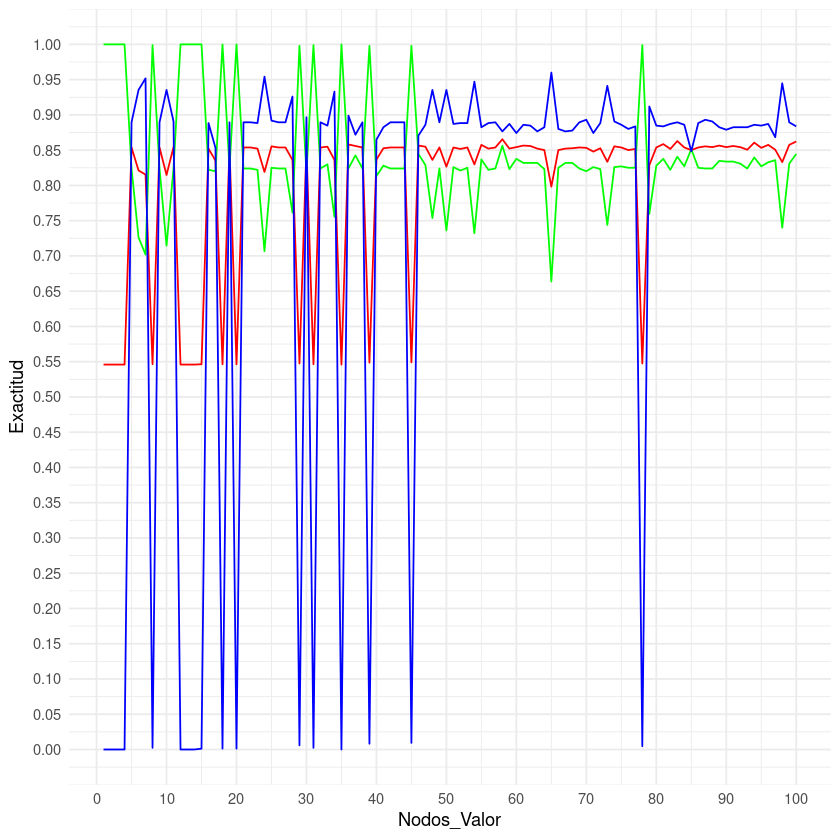

In [51]:
grafico_compara_nodos <- ggplot(compara_nodos, mapping = aes(x = Nodos_Valor)) +
    geom_line(mapping = aes(y = Exactitud), colour = "red") +
    geom_line(mapping = aes(y = Sensibilidad), colour = "green") +
    geom_line(mapping = aes(y = Especificidad), colour = "blue") +
    theme_minimal() +
    scale_y_continuous(breaks = seq(0, 1, 0.05)) +
    scale_x_continuous(breaks = seq(0, 100, 10))
grafico_compara_nodos

In [72]:
set.seed(123)

compara_iteraciones <- comparador_RRNN(
    datos_entrenamiento = training.data1,
    datos_validacion = testing.data1,
    atributos = c(atributos1),
    nodos = c(nodos1),
    iteraciones = seq(50, 5000, 50)
)


Modelo 1, atributo: 1, nodo: 1, iteración: 1
# weights:  626
initial  value 5261.260805 
iter  10 value 4304.832801
iter  20 value 4012.487322
iter  30 value 3341.109773
iter  40 value 2944.893959
iter  50 value 2887.548570
iter  60 value 2852.089537
iter  70 value 2699.855088
iter  80 value 2529.102310
iter  90 value 2499.641387
iter 100 value 2495.193127
iter 110 value 2492.793068
final  value 2492.633366 
converged

Modelo 2, atributo: 1, nodo: 1, iteración: 2
# weights:  626
initial  value 9238.019475 
iter  10 value 4313.894710
iter  20 value 3137.060359
iter  30 value 3020.675294
iter  40 value 2985.655610
iter  50 value 2976.742903
iter  60 value 2973.661636
iter  70 value 2969.662286
iter  80 value 2964.270039
iter  90 value 2959.060620
iter 100 value 2952.873869
iter 110 value 2945.180638
iter 120 value 2881.672357
iter 130 value 2769.184643
iter 140 value 2649.996941
iter 150 value 2633.412904
iter 160 value 2567.710365
iter 170 value 2497.742556
iter 180 value 2496.300459
f

In [75]:
compara_iteraciones

Modelos,Atributos,Nodos,Nodos_Valor,Iteraciones,Iteraciones_Valor,Exactitud,Sensibilidad,Especificidad
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Modelo 1,atributo1,nodo1,25,iteracion1,3000,0.8538,0.8240,0.8895
Modelo 2,atributo1,nodo1,25,iteracion2,3400,0.8538,0.8240,0.8895
Modelo 3,atributo1,nodo1,25,iteracion3,1150,0.8538,0.8240,0.8895
Modelo 4,atributo1,nodo1,25,iteracion4,600,0.8527,0.8231,0.8884


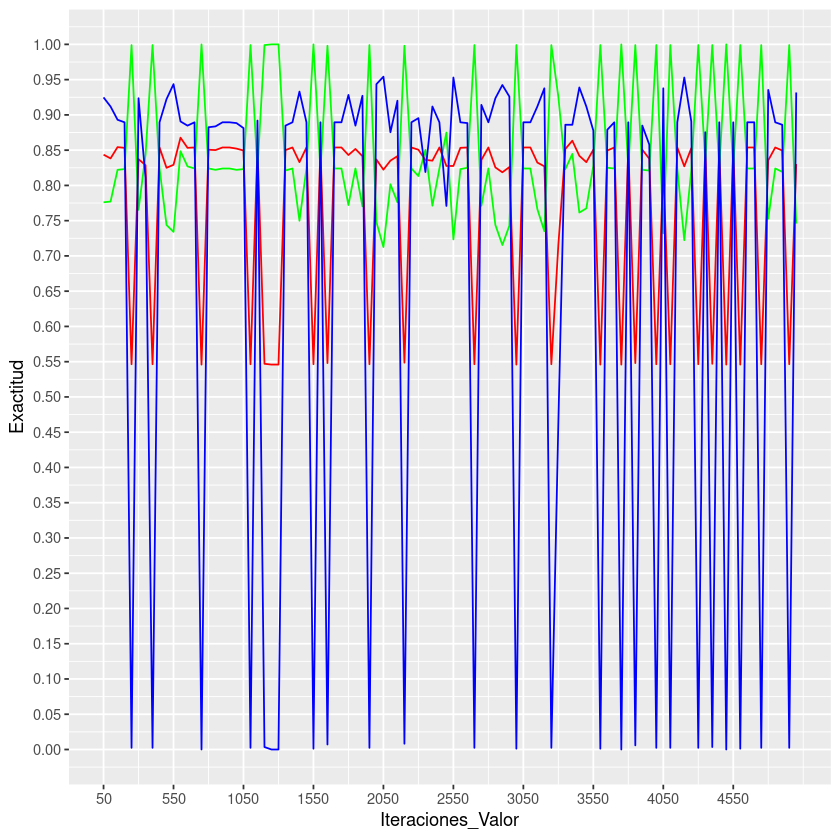

In [40]:
grafico_compara_iteraciones <- ggplot(compara_iteraciones, mapping = aes(x = Iteraciones_Valor)) +
    geom_line(mapping = aes(y = Exactitud), colour = "red") +
    geom_line(mapping = aes(y = Sensibilidad), colour = "green") +
    geom_line(mapping = aes(y = Especificidad), colour = "blue") +
    scale_y_continuous(breaks = seq(0, 1, 0.05)) +
    scale_x_continuous(breaks = seq(50, 5000, 500))
grafico_compara_iteraciones

In [76]:
compara_atributos <- comparador_RRNN(
    datos_entrenamiento = training.data1,
    datos_validacion = testing.data1,
    atributos = atributos,
    nodos = c(nodos1),
    iteraciones = c(iteraciones1)
)


Modelo 1, atributo: 1, nodo: 1, iteración: 1
# weights:  626
initial  value 5350.658343 
iter  10 value 4162.508606
iter  20 value 3432.085858
iter  30 value 3191.002006
iter  40 value 3073.338825
iter  50 value 2717.218865
iter  60 value 2592.873053
iter  70 value 2571.684130
iter  80 value 2504.060749
iter  90 value 2491.747731
iter 100 value 2484.402587
iter 110 value 2463.799371
iter 120 value 2460.294324
iter 130 value 2457.708763
iter 140 value 2456.648513
iter 150 value 2454.495756
iter 160 value 2452.790396
iter 170 value 2451.793725
iter 180 value 2451.221802
final  value 2451.217792 
converged

Modelo 2, atributo: 2, nodo: 1, iteración: 1
# weights:  601
initial  value 6478.500872 
iter  10 value 4290.511689
iter  20 value 3127.868685
iter  30 value 2865.465094
iter  40 value 2701.118364
iter  50 value 2631.165296
iter  60 value 2617.138027
iter  70 value 2583.305348
iter  80 value 2533.174010
iter  90 value 2500.643141
iter 100 value 2486.375121
iter 110 value 2470.278263
i

In [77]:
compara_atributos

Modelos,Atributos,Nodos,Nodos_Valor,Iteraciones,Iteraciones_Valor,Exactitud,Sensibilidad,Especificidad
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Modelo 1,atributo1,nodo1,25,iteracion1,3000,0.8527,0.8240,0.8872
Modelo 2,atributo2,nodo1,25,iteracion1,3000,0.8351,0.8074,0.8684
Modelo 3,atributo3,nodo1,25,iteracion1,3000,0.8303,0.7498,0.9271
Modelo 4,atributo4,nodo1,25,iteracion1,3000,0.8522,0.8280,0.8813


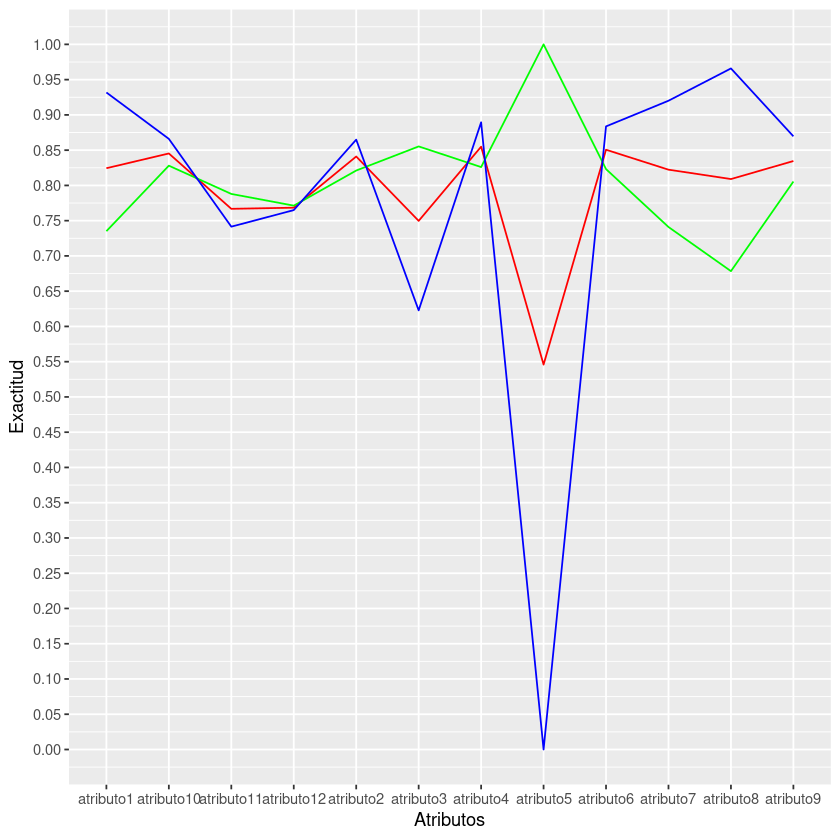

In [55]:
grafico_compara_atributos <- ggplot(compara_atributos, mapping = aes(x = Atributos, group = 1)) +
    geom_line(mapping = aes(y = Exactitud), colour = "red") +
    geom_line(mapping = aes(y = Sensibilidad), colour = "green") +
    geom_line(mapping = aes(y = Especificidad), colour = "blue") +
    scale_y_continuous(breaks = seq(0, 1, 0.05))
grafico_compara_atributos

In [ ]:
set.seed(123)

compara_nodos_final <- comparador_RRNN(
    datos_entrenamiento = training.data1,
    datos_validacion = testing.data1,
    atributos = c(atributos1),
    nodos = nodos,
    iteraciones = c(iteraciones1)
)

In [ ]:
compara_nodos_final %>% arrange(Exactitud) %>% tail(n = 6) %>% arrange(Nodos_Valor)
compara_nodos_final %>% filter(Sensibilidad < 0.99) %>% arrange(Sensibilidad) %>% tail(n = 6) %>% arrange(Nodos_Valor)
compara_nodos_final %>% filter(Especificidad < 0.9) %>% arrange(Especificidad) %>% tail(n = 5)

In [ ]:
set.seed(123)

compara_iteraciones_final <- comparador_RRNN(
    datos_entrenamiento = training.data1,
    datos_validacion = testing.data1,
    atributos = c(atributos1),
    nodos = c(nodos1),
    iteraciones = iteraciones
)

In [ ]:
compara_iteraciones_final %>% arrange(Exactitud) %>% tail(n = 5) %>% arrange(Nodos_Valor)
compara_iteraciones_final %>% filter(Sensibilidad < 0.99) %>% arrange(Sensibilidad) %>% tail(n = 5) %>% arrange(Nodos_Valor)
compara_iteraciones_final %>% filter(Especificidad < 0.9) %>% arrange(Especificidad) %>% tail(n = 5) %>% arrange(Nodos_Valor)

In [78]:
set.seed(123)

comparacion_total <- comparador_RRNN(
    datos_entrenamiento = training.data1,
    datos_validacion = testing.data1,
    atributos = atributos,
    nodos = nodos,
    iteraciones = iteraciones
)


Modelo 1, atributo: 1, nodo: 1, iteración: 1
# weights:  626
initial  value 5261.260805 
iter  10 value 4304.832801
iter  20 value 4012.487322
iter  30 value 3341.109773
iter  40 value 2944.893959
iter  50 value 2887.548570
iter  60 value 2852.089537
iter  70 value 2699.855088
iter  80 value 2529.102310
iter  90 value 2499.641387
iter 100 value 2495.193127
iter 110 value 2492.793068
final  value 2492.633366 
converged

Modelo 2, atributo: 1, nodo: 1, iteración: 2
# weights:  626
initial  value 9238.019475 
iter  10 value 4313.894710
iter  20 value 3137.060359
iter  30 value 3020.675294
iter  40 value 2985.655610
iter  50 value 2976.742903
iter  60 value 2973.661636
iter  70 value 2969.662286
iter  80 value 2964.270039
iter  90 value 2959.060620
iter 100 value 2952.873869
iter 110 value 2945.180638
iter 120 value 2881.672357
iter 130 value 2769.184643
iter 140 value 2649.996941
iter 150 value 2633.412904
iter 160 value 2567.710365
iter 170 value 2497.742556
iter 180 value 2496.300459
f

In [82]:
comparacion_total %>% arrange(Exactitud) %>% tail(n = 3) %>% arrange(Modelos)
comparacion_total %>% filter(Sensibilidad < 1) %>% arrange(Sensibilidad) %>% tail(n = 3) %>% arrange(Modelos)
comparacion_total %>% arrange(Especificidad) %>% tail(n = 3) %>% arrange(Modelos)

Modelos,Atributos,Nodos,Nodos_Valor,Iteraciones,Iteraciones_Valor,Exactitud,Sensibilidad,Especificidad
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Modelo 16,atributo1,nodo4,100,iteracion4,600,0.8591,0.8436,0.8778
Modelo 39,atributo3,nodo2,58,iteracion3,1150,0.8634,0.8563,0.8719
Modelo 52,atributo4,nodo1,25,iteracion4,600,0.8602,0.8416,0.8825


Modelos,Atributos,Nodos,Nodos_Valor,Iteraciones,Iteraciones_Valor,Exactitud,Sensibilidad,Especificidad
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Modelo 15,atributo1,nodo4,100,iteracion3,1150,0.8463,0.8817,0.8038
Modelo 39,atributo3,nodo2,58,iteracion3,1150,0.8634,0.8563,0.8719
Modelo 5,atributo1,nodo2,58,iteracion1,3000,0.8298,0.8583,0.7955


Modelos,Atributos,Nodos,Nodos_Valor,Iteraciones,Iteraciones_Valor,Exactitud,Sensibilidad,Especificidad
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Modelo 34,atributo3,nodo1,25,iteracion2,3400,0.8276,0.7292,0.9459
Modelo 35,atributo3,nodo1,25,iteracion3,1150,0.8196,0.7097,0.9518
Modelo 60,atributo4,nodo3,83,iteracion4,600,0.8170,0.6999,0.9577


In [144]:
# Análisis de modelos raros

modelo_RN_raro <- nnet(
    atributos[[2]], data = datos_entrenamiento, MaxNWts = 10000,
    size = nodos[[3]], maxit = iteraciones[[3]]
)
prediccion_RN_rara <- predict(modelo_RN_raro, datos_validacion, type="class")
cat("Niveles de la predicción:", levels(as.factor(prediccion_RN_rara)), "\n")
cat("Niveles de la observación:", levels(as.factor(datos_validacion$OK)), "\n")
matriz_rara <- confusionMatrix(data = as.factor(prediccion_RN_rara), reference = as.factor(datos_validacion$OK), positive = "no")
matriz_rara

# weights:  806
initial  value 5953.492023 
final  value 5162.944800 
converged
Niveles de la predicción: no 
Niveles de la observación: no yes 


Warning message in confusionMatrix.default(data = as.factor(prediccion_RN_rara), :
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1023  851
       yes    0    0
                                         
               Accuracy : 0.5459         
                 95% CI : (0.523, 0.5686)
    No Information Rate : 0.5459         
    P-Value [Acc > NIR] : 0.5095         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.0000         
         Pos Pred Value : 0.5459         
         Neg Pred Value :    NaN         
             Prevalence : 0.5459         
         Detection Rate : 0.5459         
   Detection Prevalence : 1.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : no             
                                         


---

**Complemento: Ejercicio de comprobación manual**


Para verificar que alguno de los modelos realmente predice correctamente, se comprueba con los datos de una persona en particular, pidiendo la predicción al modelo. A continuación hay dos ejemplos, que se pueden modificar para ver su resultado, cambiando valores y también, cambiando el modelo a utilizar en la predicción. No se necesita modificar, ni comentar esta parte en la entrega, sino que se entrega como complemento para quienes tengan el interés de ver cómo se aplica un modelo entrenado en un contexto práctico (en producción)

In [24]:
# Ejemplo 1: La predicción debería ser "YES"
set.seed(123)
sample_x <- clean.subdata[1,]
sample_x[1,1] <- 32       # Edad
sample_x[1,2] <- 'admin.' # Ocupación
sample_x[1,3] <- 'single' # EstadoCivil
sample_x[1,4] <- 'university.degree'  # Educación
sample_x

prediction <- predict(RF_model, sample_x)
prediction


# Ejemplo 2: La predicción debería ser "NO"
sample_x2 <- clean.subdata[1,]
sample_x2[1,10] <- 10   # Duración
sample_x2

prediction <- predict(RF_model, sample_x2)
prediction


,Edad,Ocupación,EstadoCivil,Educación,Hipotecario,Consumo,Contacto,Mes,Día,Duración,NumContactos,ResultadoPrevio,EmpTasaVar,IPC,ICC,NumEmpleados,OK
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
76,32,admin.,single,university.degree,yes,no,telephone,may,mon,1575,1,nonexistent,1.1,93.994,-36.4,5191,yes


76 
yes 
Levels: no yes

,Edad,Ocupación,EstadoCivil,Educación,Hipotecario,Consumo,Contacto,Mes,Día,Duración,NumContactos,ResultadoPrevio,EmpTasaVar,IPC,ICC,NumEmpleados,OK
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
76,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,10,1,nonexistent,1.1,93.994,-36.4,5191,yes


76 
no 
Levels: no yes